# ML model to predict student pass/fail from a student performance dataset

In [37]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [38]:
# Load data file
df = pd.read_csv("StudentsPerformance.csv")  

In [13]:
# Display dataframe's structure in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [39]:
# Preview top rows of the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data preprocessing

In [40]:
# Check for missing values
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [60]:
# Create a copy of the original DataFrame
df_encoded = df.copy()

# Encode all categorical columns
label_encoders = {}

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [31]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [43]:
# First, calculate average score across 3 subjects
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Define 'pass' based on average score
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)


In [44]:
df = df.drop(['average_score'], axis=1) # drop average_score column to avoid redundancy

##  EDA and student pass/fail prediction based on the features

In [27]:
df.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.482000,2.174000,2.486000,0.645000,0.642000,66.08900,69.169000,68.054000
std,0.499926,1.157179,1.829522,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,0.000000,2.000000,2.000000,1.000000,1.000000,66.00000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000


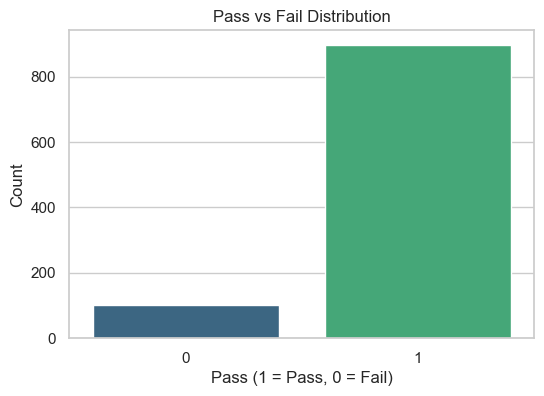

In [47]:
# Set style
sns.set(style='whitegrid')
# Pass/fail distribution
plt.figure(figsize=(6,4))
sns.countplot(x='pass', data=df, palette='viridis')
plt.title('Pass vs Fail Distribution')
plt.xlabel('Pass (1 = Pass, 0 = Fail)')
plt.ylabel('Count')
plt.show()

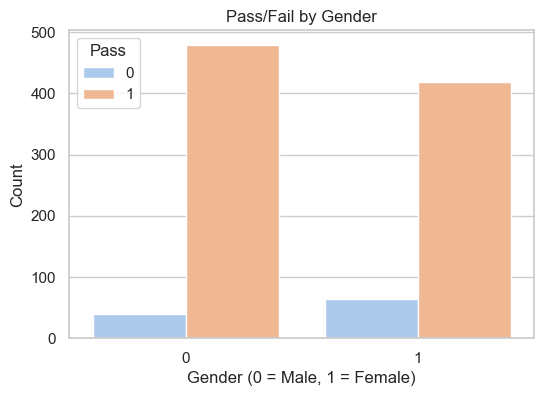

In [48]:
# Gender vs pass rate
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='pass', data=df, palette='pastel')
plt.title('Pass/Fail by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(title='Pass')
plt.show()

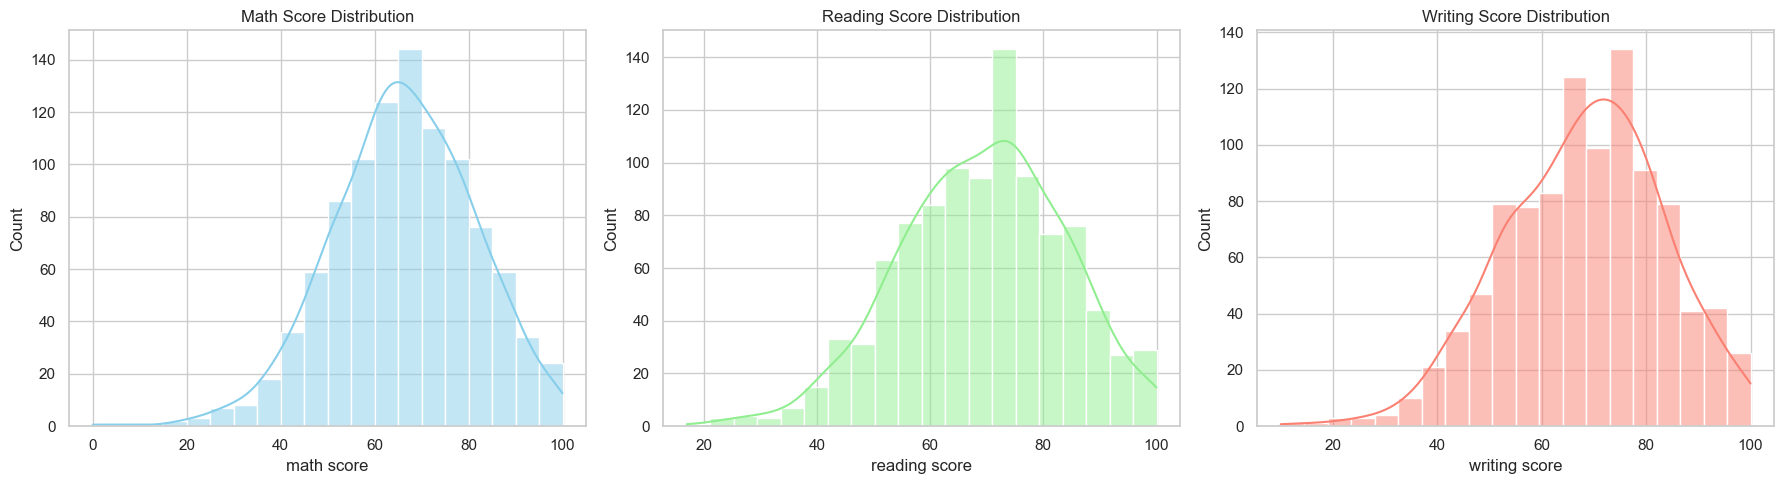

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['math score'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Math Score Distribution')

sns.histplot(df['reading score'], bins=20, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Reading Score Distribution')

sns.histplot(df['writing score'], bins=20, kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Writing Score Distribution')

plt.tight_layout()
plt.show()

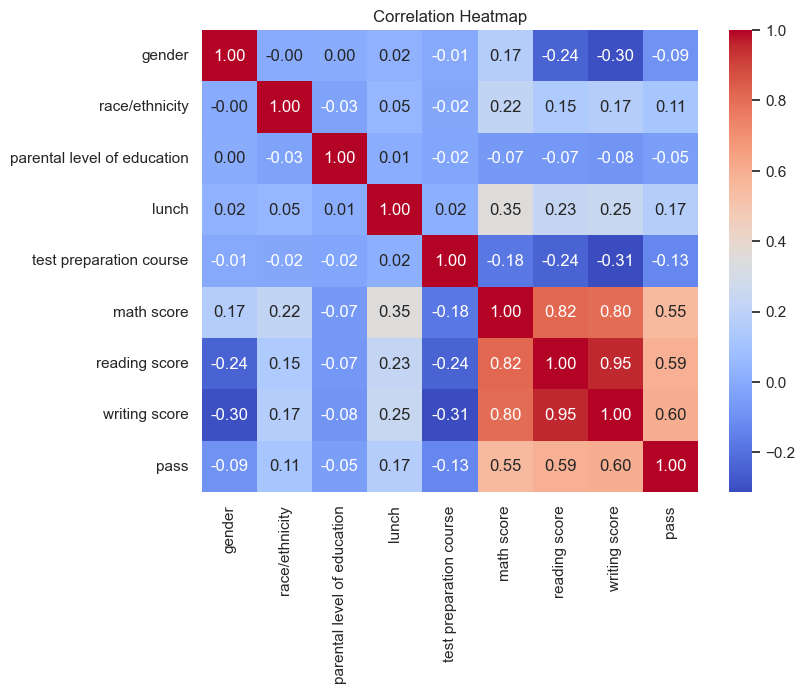

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

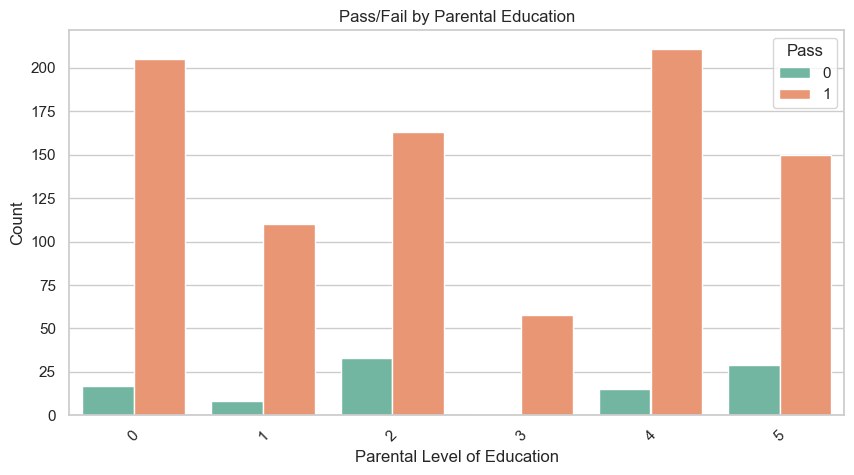

In [51]:
# Parental Education vs pass rate
plt.figure(figsize=(10,5))
sns.countplot(x='parental level of education', hue='pass', data=df, palette='Set2')
plt.title('Pass/Fail by Parental Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Count')
plt.legend(title='Pass')
plt.xticks(rotation=45)
plt.show()

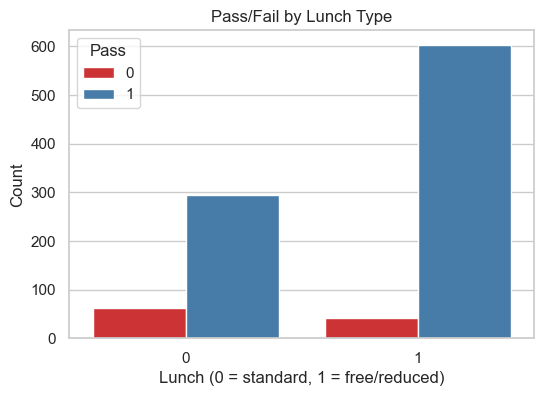

In [52]:
# Lunch type vs pass rate
plt.figure(figsize=(6,4))
sns.countplot(x='lunch', hue='pass', data=df, palette='Set1')
plt.title('Pass/Fail by Lunch Type')
plt.xlabel('Lunch (0 = standard, 1 = free/reduced)')
plt.ylabel('Count')
plt.legend(title='Pass')
plt.show()

In [61]:
# Define features and target
X = df_encoded.drop('pass', axis=1)
y = df_encoded['pass']

## Model Training and Evaluation

In [69]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
# Define models in a dictionary
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Train and evaluate both models
for name, model in models.items():
    print(f"\n{name} Model Training and Evaluation")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Random Forest Model Training and Evaluation
Confusion Matrix:
[[ 26   1]
 [  0 173]]
Accuracy: 0.9950
F1 Score: 0.9971
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.99      1.00      1.00       173

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200


Logistic Regression Model Training and Evaluation
Confusion Matrix:
[[ 25   2]
 [  1 172]]
Accuracy: 0.9850
F1 Score: 0.9914
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.98      0.96      0.97       200
weighted avg       0.98      0.98      0.98       200



C:\Users\marys\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Inference:
Both models perform very well, but Random Forest shows a slightly better overall performance, especially in:
Recall (sensitivity): No actual fail cases were missed.
Precision: Very few false alarms.

For decision-making use cases where accuracy and reliability are critical, Random Forest is the better choice.

However, Logistic Regression may still be favored despite the minor trade-off in accuracy if model interpretability is a priority.